In [1]:
from sklearn.datasets import load_boston
import seaborn as sns
sns.set()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = load_boston()
features = data.data[:, 5]
target = data.target
features.shape

(506,)

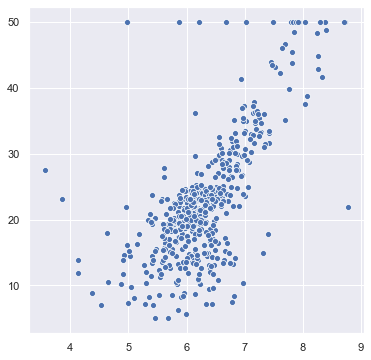

In [3]:
plt.figure(figsize=(6,6))
sns.scatterplot(features, target)
plt.show()

In [175]:
np.random.choice([1,2,3],size=10, p=[0.2,.3,.5])

array([3, 3, 3, 3, 3, 2, 3, 2, 1, 3])

# 手动实现

In [116]:
alpha, k, b = np.random.random(3) / 10
update_cnt = 1
flag = 1
min_loss = float('inf')
data_size = data.data.shape[0]
loss = []
while flag:
    update_cnt += 1
    y_pred = k * features + b
    current_loss = np.sum(np.square(target - y_pred)) / data_size
    if current_loss < min_loss:
        if min_loss - current_loss < .000001:
            flag = 0
        min_loss = current_loss
    k = k - alpha * np.sum((y_pred - target) * features) / data_size
    b = b - alpha * np.sum(y_pred - target) / data_size
    if not update_cnt % 1000:
        print(f"第 {update_cnt} 次迭代：当前损失为 {min_loss}")
        loss.append(current_loss)
print(f"\n总迭代次数 {update_cnt}, 当前损失为 {min_loss}, 得到的参数为k:{k}, b:{b}")

第 1000 次迭代：当前损失为 54.50805476427185
第 2000 次迭代：当前损失为 51.35658938496988
第 3000 次迭代：当前损失为 49.11566549653154
第 4000 次迭代：当前损失为 47.52220364010274
第 5000 次迭代：当前损失为 46.38913495312339
第 6000 次迭代：当前损失为 45.5834397027266
第 7000 次迭代：当前损失为 45.01053106623213
第 8000 次迭代：当前损失为 44.60315084944629
第 9000 次迭代：当前损失为 44.31347352490122
第 10000 次迭代：当前损失为 44.107491621760126
第 11000 次迭代：当前损失为 43.96102332470488
第 12000 次迭代：当前损失为 43.856873582833785
第 13000 次迭代：当前损失为 43.78281544909496
第 14000 次迭代：当前损失为 43.730154664014336
第 15000 次迭代：当前损失为 43.69270896905409
第 16000 次迭代：当前损失为 43.66608232326997
第 17000 次迭代：当前损失为 43.647148817924005
第 18000 次迭代：当前损失为 43.63368570178119
第 19000 次迭代：当前损失为 43.62411243507947
第 20000 次迭代：当前损失为 43.61730513769231
第 21000 次迭代：当前损失为 43.612464648112194
第 22000 次迭代：当前损失为 43.60902270367483
第 23000 次迭代：当前损失为 43.60657522779171
第 24000 次迭代：当前损失为 43.60483489226117
第 25000 次迭代：当前损失为 43.60359738557938
总迭代次数 25112, 当前损失为 43.60348326746681, 得到的参数为k:9.025440216297296, b:-34.18292171536133


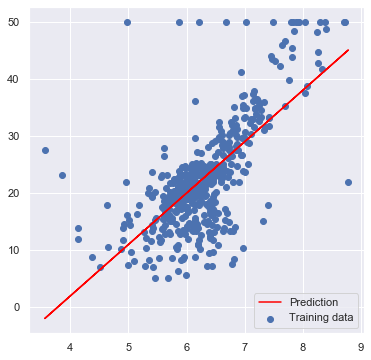

In [117]:
best_pred = k * features + b

plt.figure(figsize=(6,6))
plt.scatter(features, target, label='Training data')
plt.plot(features, best_pred, color='red', label='Prediction')
plt.legend()
plt.show()

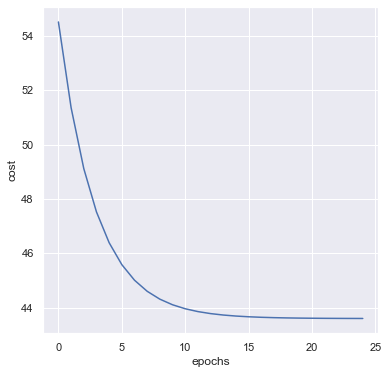

In [118]:
plt.figure(figsize=(6,6))
plt.plot(range(len(loss)), loss)
plt.xlabel('epochs')
plt.ylabel('cost')
plt.show()

# API实现

In [119]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [120]:
w = tf.Variable(np.random.randn(), name='weight')
b = tf.Variable(np.random.randn(), name='bias')

In [123]:
def linear_regression(x):
    return w * x + b

def mean_square(y_pred, y):
    return tf.reduce_sum(tf.pow(y_pred-y, 2)) / data_size

In [125]:
optimizer = tf.optimizers.SGD(alpha)

In [126]:
def run():
    with tf.GradientTape() as g:
        pred = linear_regression(features)
        loss = mean_square(pred, target)
    gradients = g.gradient(loss, [w, b])
    optimizer.apply_gradients(zip(gradients, [w, b]))

In [130]:
max_step = 10000
for step in range(1, max_step +1):
    run()
    if not step % 1000:
        pred = linear_regression(features)
        loss = mean_square(pred, target)
        print(f"step: {step}, loss: {loss}, w: {w.numpy()}, b: {b.numpy()}")

step: 1000, loss: 24.47551727294922, w: 5.826106548309326, b: -13.831583976745605
step: 2000, loss: 23.70256805419922, w: 6.3396148681640625, b: -17.09807014465332
step: 3000, loss: 23.15294647216797, w: 6.77263069152832, b: -19.852537155151367
step: 4000, loss: 22.762126922607422, w: 7.137770175933838, b: -22.175230026245117
step: 5000, loss: 22.484222412109375, w: 7.445674419403076, b: -24.133846282958984
step: 6000, loss: 22.28661346435547, w: 7.70531702041626, b: -25.78546142578125
step: 7000, loss: 22.146100997924805, w: 7.924259662628174, b: -27.17818260192871
step: 8000, loss: 22.04618263244629, w: 8.108882904052734, b: -28.35259246826172
step: 9000, loss: 21.975135803222656, w: 8.264568328857422, b: -29.342924118041992
step: 10000, loss: 21.92461395263672, w: 8.39584732055664, b: -30.178010940551758


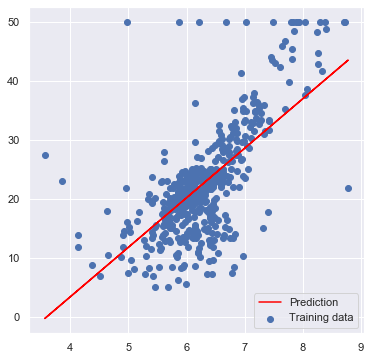

In [131]:
best_pred2 = w * features + b

plt.figure(figsize=(6,6))
plt.scatter(features, target, label='Training data')
plt.plot(features, best_pred2, color='red', label='Prediction')
plt.legend()
plt.show()

# Keras API

In [172]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(1,)))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [174]:
model.compile(optimizer='SGD', loss='mean_squared_error')
model.fit(features, target, epochs=10000, batch_size=data_size,
          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)])

Train on 506 samples
Epoch 1/10000
506/506 [==============================] - 0s 820us/sample - loss: 987.2435
Epoch 2/10000
506/506 [==============================] - 0s 2us/sample - loss: 89.2669
Epoch 3/10000
506/506 [==============================] - 0s 4us/sample - loss: 60.0183
Epoch 4/10000
506/506 [==============================] - 0s 2us/sample - loss: 59.0587
Epoch 5/10000
506/506 [==============================] - 0s 4us/sample - loss: 59.0203
Epoch 6/10000
506/506 [==============================] - 0s 4us/sample - loss: 59.0119
Epoch 7/10000
506/506 [==============================] - 0s 4us/sample - loss: 59.0044
Epoch 8/10000
506/506 [==============================] - 0s 6us/sample - loss: 58.9970
Epoch 9/10000
506/506 [==============================] - 0s 4us/sample - loss: 58.9896
Epoch 10/10000
506/506 [==============================] - 0s 4us/sample - loss: 58.9822
Epoch 11/10000
506/506 [==============================] - 0s 6us/sample - loss: 58.9748
Epoch 12/10000
50

KeyboardInterrupt: 

In [167]:
w = model.weights[0].numpy()
b = model.weights[1].numpy()

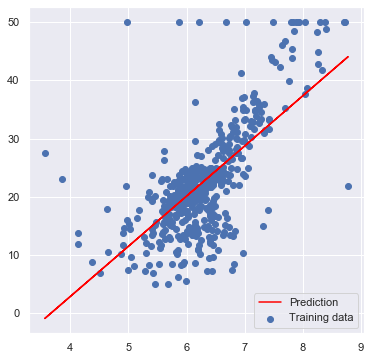

In [168]:
best_pred3 = w * features + b

plt.figure(figsize=(6,6))
plt.scatter(features, target, label='Training data')
plt.plot(features, best_pred3.ravel(), color='red', label='Prediction')
plt.legend()
plt.show()

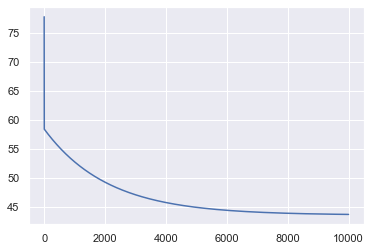

In [169]:
plt.plot(model.history.history['loss'])
plt.show()